# Ridge and Lasso Regression

## Introduction

### Ridge Regression
Ridge Regression (also known as Tikhonov regularization) adds a penalty equal to the sum of the squared values of the coefficients (L2 regularization). This helps to shrink the coefficients but never sets them to zero, so it includes all predictors in the model.

### Lasso Regression
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds a penalty equal to the sum of the absolute values of the coefficients (L1 regularization). This can shrink some coefficients to zero, effectively performing variable selection.

## Advantages and Disadvantages

### Ridge Regression

**Advantages:**
1. **Handles Multicollinearity**: Effective in dealing with multicollinearity (when predictor variables are highly correlated).
2. **Includes All Features**: Keeps all the features in the model, which can be useful when you believe all predictors have some level of importance.
3. **Stability**: Stabilizes the estimation of the coefficients, leading to better performance on unseen data.

**Disadvantages:**
1. **Does Not Perform Feature Selection**: Unlike Lasso, Ridge does not set any coefficients to zero, so it does not perform feature selection.
2. **Complexity**: Interpreting the model can become more complex, especially with a large number of predictors.

### Lasso Regression

**Advantages:**
1. **Performs Feature Selection**: Can shrink some coefficients to zero, effectively removing those predictors from the model.
2. **Simplifies the Model**: Results in a simpler and more interpretable model, especially when dealing with high-dimensional data.
3. **Handles Multicollinearity**: Like Ridge, Lasso can also handle multicollinearity by regularizing the coefficients.

**Disadvantages:**
1. **Can Eliminate Too Many Features**: Might shrink coefficients to zero more aggressively than desired.
2. **Selection of Lambda**: The choice of the regularization parameter (\(\alpha\)) is crucial. If not chosen properly, the model can either overfit or underfit.
3. **Bias**: While reducing variance, Lasso can introduce bias into the estimates.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [8]:
# Create a synthetic dataset
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Ridge and Lasso regression models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

In [9]:
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Calculate and print the mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Ridge Regression MSE: {:.2f}".format(mse_ridge))
print("Lasso Regression MSE: {:.2f}".format(mse_lasso))



Ridge Regression MSE: 3.23
Lasso Regression MSE: 0.12


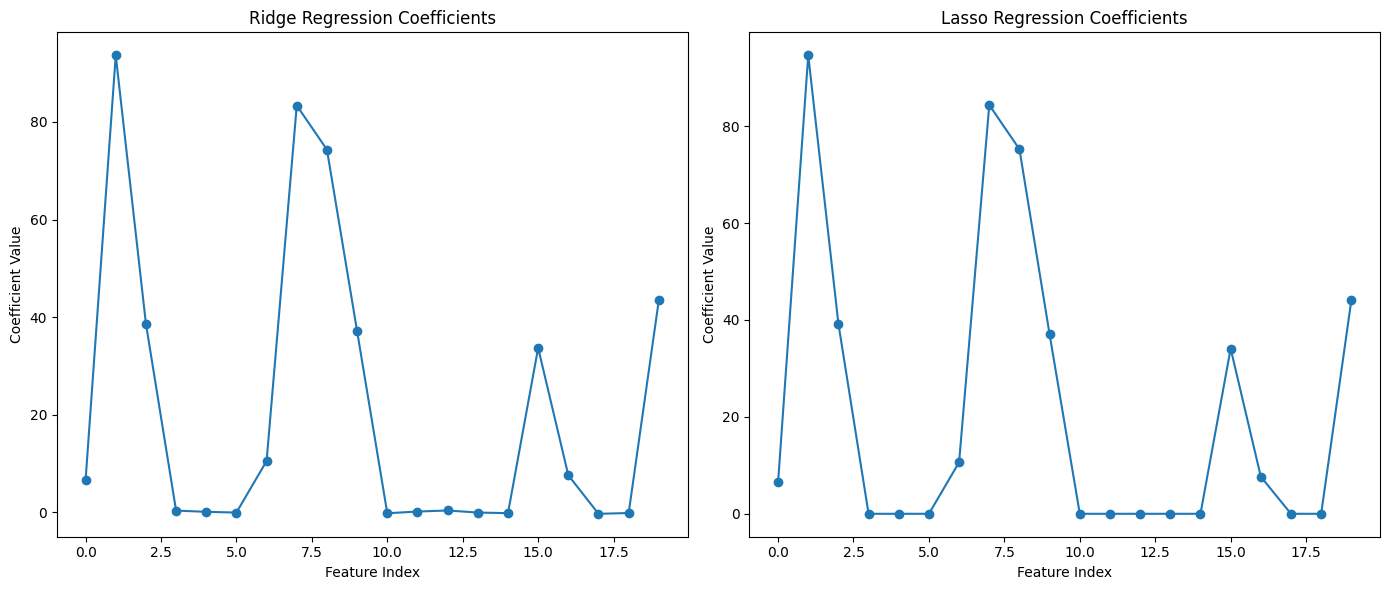

In [10]:
# Plot the coefficients
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(ridge.coef_, marker='o')
plt.title('Ridge Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.subplot(1, 2, 2)
plt.plot(lasso.coef_, marker='o')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()
